In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

In [6]:
info_df = pd.read_csv('../complete_info_t.csv')
dubbed_df = pd.read_csv('../movies_dubbed copy.csv')


In [7]:
info_df.head(2)

,file,speaker,film,emotion,language,transcritpion,timestamp
0,f_ans001aen,Meryl Streep,the hours,ans,en,"[non-verbal] I don't know what's happening, I'...","00:54:58,518"
1,f_ans001aes,Rosa Guiñón,the hours,ans,es,"No sé lo que me pasa, lo siento.","00:54:59,350"


<Axes: xlabel='language', ylabel='Count'>

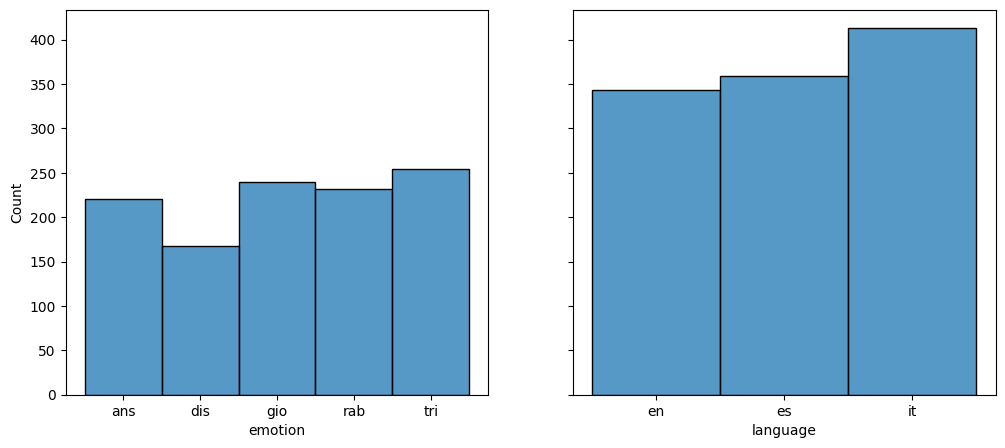

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(ax=axs[0], data=info_df, x='emotion')
sns.histplot(ax=axs[1], data=info_df, x='language')


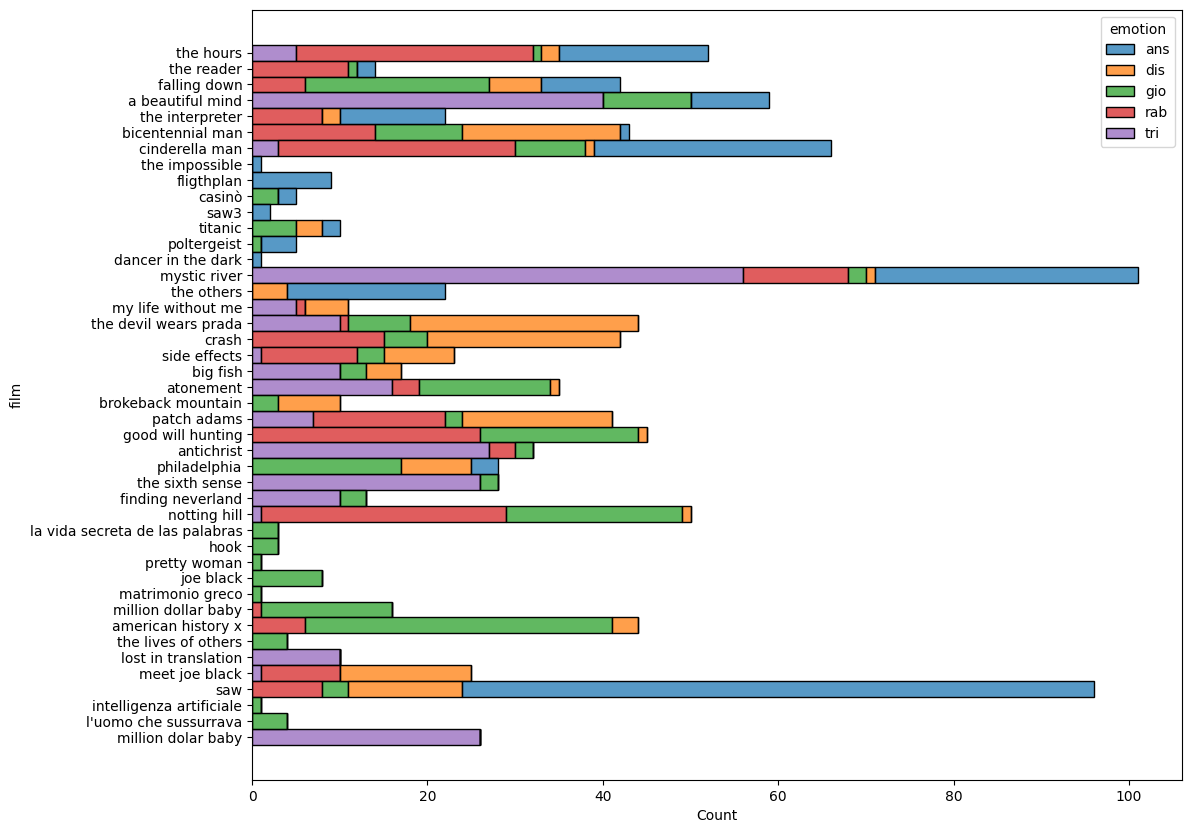

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(data=info_df, y='film', hue='emotion', multiple='stack')
plt.show()

In [10]:
speakers_by_film = info_df.groupby('film')['speaker'].unique()

# Print the result
for film, speakers in speakers_by_film.items():
    print(f"Film: {film}")
    print("Speakers:")
    for speaker in speakers:
        print(f"- {speaker}")
    print("\n")

Film: a beautiful mind
Speakers:
- Jennifer Connelly
- Nuria Mediavilla
- Giuppy Izzo
- Armando Carreras
- Fabrizio Pucci
- Sergio Zamora
- Francesco Bulckaen
- Russell Crowe
- Christian Iansante


Film: american history x
Speakers:
- Unknown female
- Silvia Tognoloni
- Laura Boccanera
- Edward Norton
- Guillermo Romero
- Massimo De Ambrosis 
- Ethan Suplee
- Francisco Javier Martinez
- Simone Mori
- Edward Furlong
- Juan Logar
- Massimo De Ambrosis
- Guy Torry
- Miguel Zuniga
- Stefano Crescentini
- Luis Bajo
- Francesco Pannofino


Film: antichrist
Speakers:
- Pepa Castro
- Valentina Carnelutti
- Charlotte Gainsbourg


Film: atonement
Speakers:
- Myriam Catania
- Keira Knightley
- Unknown female
- Michelle Duncan
- Nuria Trifol
- Myriam Catania 
- Romola Garai
- Mar Bordallo
- Domitilla D’Amico
- James McAvoy
- Juan Logar
- Stefano Crescentini


Film: bicentennial man
Speakers:
- Mercedes Montalá
- Embeth Davidtz
- Eleonora De Angelis
- Pinella Dragani
- Bradley Whitford
- Roberto Ga

In [11]:
speakers_count = info_df.groupby('film')['speaker'].nunique()

# Plotting
# speakers_count.plot(kind='bar', color='skyblue')
# plt.xlabel('Film')
# plt.ylabel('Number of Speakers')
# plt.title('Number of Speakers for Each Film')
# plt.show()

In [12]:
dubbed_list = dubbed_df.loc[dubbed_df['dubbed'] == 'dub']['film'].tolist()
dubbed_list

['million dollar baby',
 'the impossible',
 'meet joe black',
 'pretty woman',
 'titanic',
 'the devil wears prada']

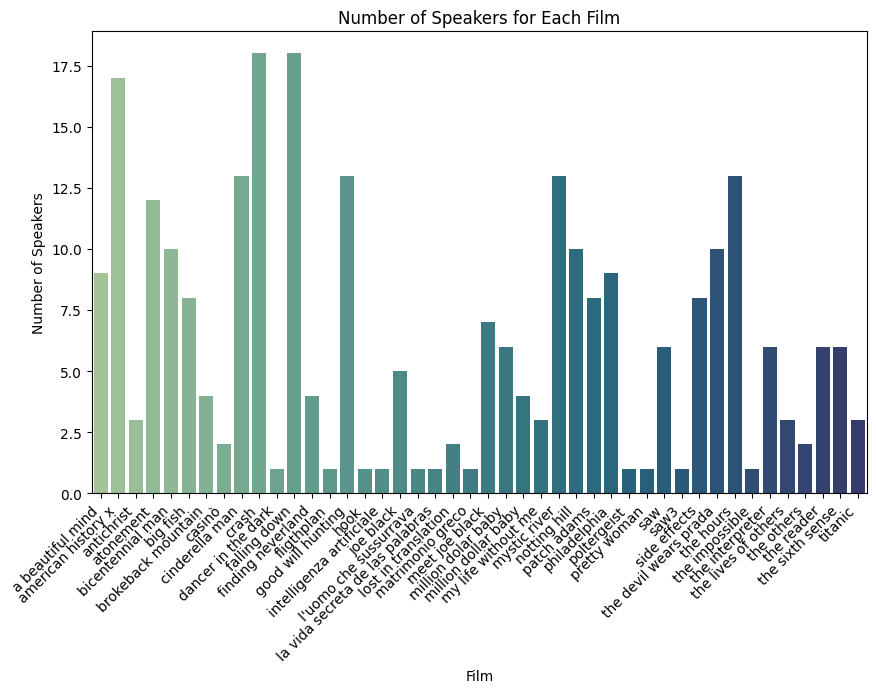

In [13]:

speakers_count = info_df.groupby('film')['speaker'].nunique().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='film', y='speaker', data=speakers_count, palette='crest', hue='film', legend=False)
plt.xlabel('Film')
plt.ylabel('Number of Speakers')
plt.title('Number of Speakers for Each Film')
plt.xticks(rotation=45, ha='right')
plt.show()


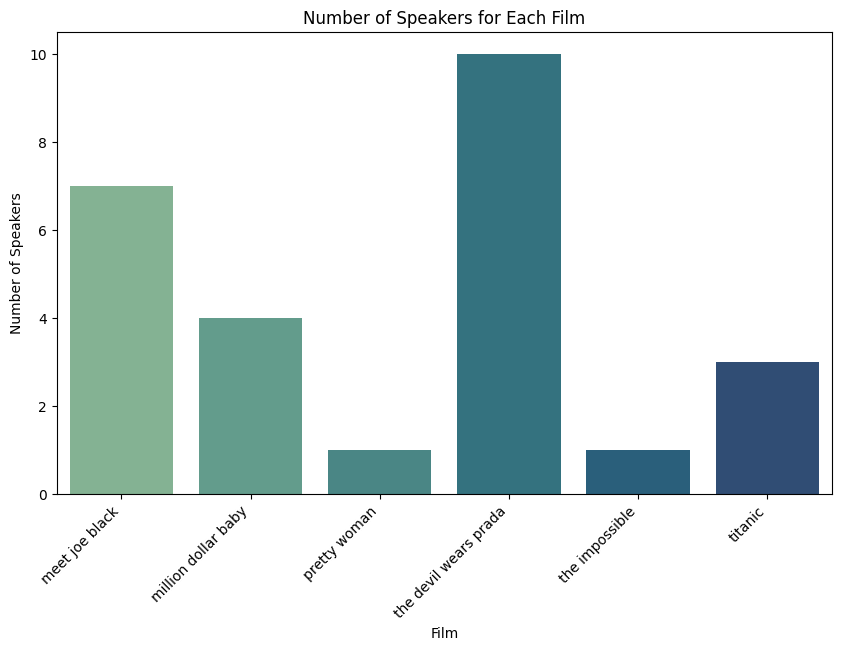

In [14]:
dub_only_df = info_df[info_df['film'].isin(dubbed_list)]
speakers_count = dub_only_df.groupby('film')['speaker'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='film', y='speaker', data=speakers_count, palette='crest', hue='film', legend=False)
plt.xlabel('Film')
plt.ylabel('Number of Speakers')
plt.title('Number of Speakers for Each Film')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# create new DataFrame that only contains rows without NaNs in points column
dub_only_no_nan_df = dub_only_df[~dub_only_df['timestamp'].isna()]

In [21]:
info_no_nan_df = info_df[~info_df['timestamp'].isna()]

<Axes: xlabel='language', ylabel='Count'>

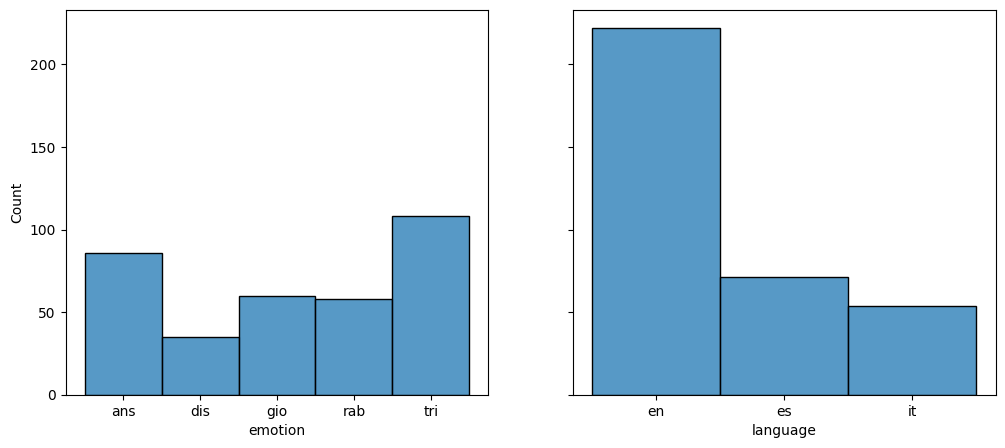

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(ax=axs[0], data=info_no_nan_df, x='emotion')
sns.histplot(ax=axs[1], data=info_no_nan_df, x='language')

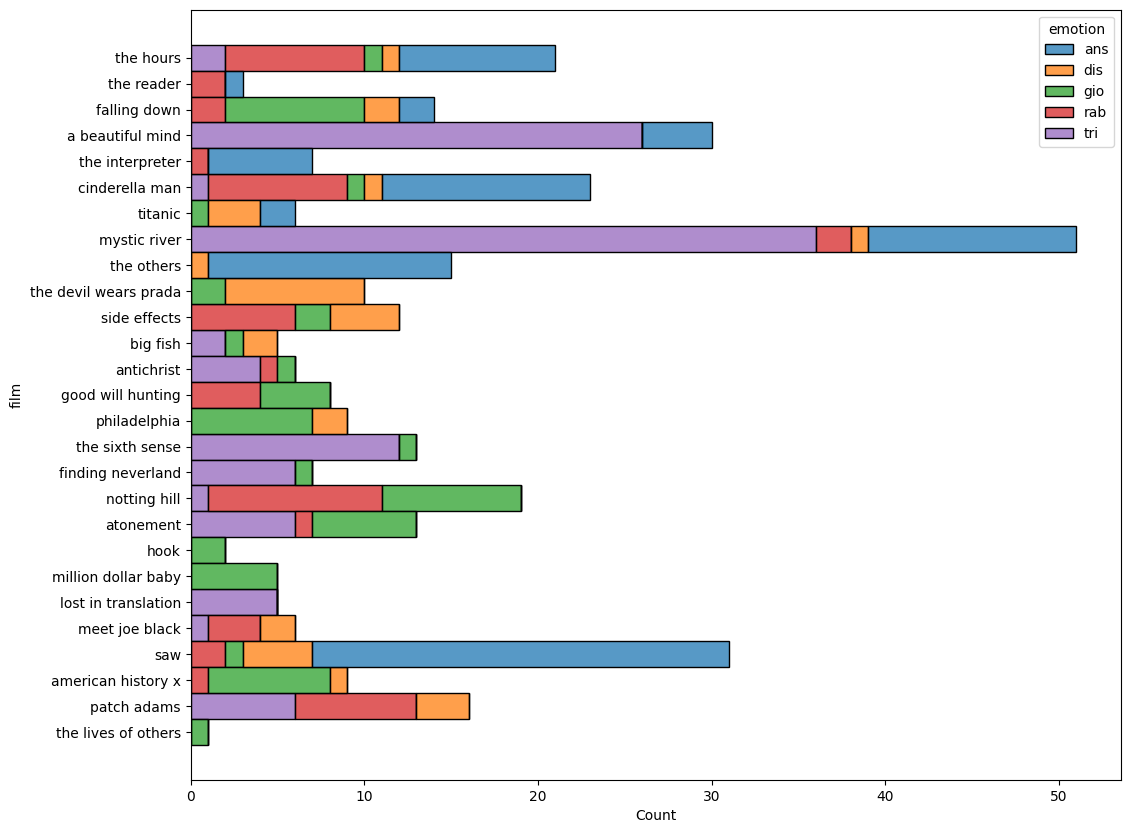

In [49]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(data=info_no_nan_df, y='film', hue='emotion', multiple='stack')
plt.show()

In [22]:
print(len(dub_only_no_nan_df), len(info_no_nan_df))

27 347


In [43]:
grouped = dub_only_no_nan_df.groupby('film', group_keys=False)

for key, item in grouped:
    # group = grouped.get_group(key)
    # print(group, "\n\n")
    print(f"{item.file} {item.film} {item.timestamp}")

# for film, speakers in speakers_by_film.items():
#     print(f"Film: {film}")
#     print("Speakers:")
#     for speaker in speakers:
#         print(f"- {speaker}")
#     print("\n")

519    f_tri059aes
669    m_dis008ben
677    m_dis013aen
942    m_rab084aen
945    m_rab085aen
946    m_rab087aen
Name: file, dtype: object 519    meet joe black
669    meet joe black
677    meet joe black
942    meet joe black
945    meet joe black
946    meet joe black
Name: film, dtype: object 519    00:12:45,469
669    00:59:33,403
677    01:18:51,960
942    01:53:57,063
945    00:16:10,636
946    01:58:34,207
Name: timestamp, dtype: object
280    f_gio206aen
282    f_gio207aen
284    f_gio208aen
286    f_gio209aen
291    f_gio212aen
Name: file, dtype: object 280    million dollar baby
282    million dollar baby
284    million dollar baby
286    million dollar baby
291    million dollar baby
Name: film, dtype: object 280    00:16:43,416
282    00:21:07,805
284    00:21:15,021
286    00:21:59,023
291    01:06:57,806
Name: timestamp, dtype: object
119    f_dis014bes
120    f_dis016aen
173    f_dis108aen
174    f_dis108aes
177    f_dis150aen
184    f_dis201aes
185    f_dis202aen
187  

In [47]:
dub_only_no_nan_df.loc[dub_only_df['film'] == 'the devil wears prada']

,file,speaker,film,emotion,language,transcritpion,timestamp
119,f_dis014bes,Joël Mulachs,the devil wears prada,dis,es,En recursos humanos tienen un sentido del humo...,"00:03:47,518"
120,f_dis016aen,Emily Blunt,the devil wears prada,dis,en,"Yeah, whoopee.","00:45:48,037"
173,f_dis108aen,Meryl Streep,the devil wears prada,dis,en,That wasn't a question.,"00:09:01,872"
174,f_dis108aes,Rosa Guiñón,the devil wears prada,dis,es,No era una pregunta.,"00:09:01,958"
177,f_dis150aen,Meryl Streep,the devil wears prada,dis,en,"And you can do anything, right?","00:49:37,766"
184,f_dis201aes,Rosa Guiñón,the devil wears prada,dis,es,Pero si ya lo hiciste.,"01:37:35,140"
185,f_dis202aen,Meryl Streep,the devil wears prada,dis,en,"And before today, you had never heard of me?","00:08:47,483"
187,f_dis204aen,Meryl Streep,the devil wears prada,dis,en,Has she died or something?,"00:12:38,839"
209,f_gio016aen,Anne Hathaway,the devil wears prada,gio,en,I'm not a psycho.,"00:45:40,863"
210,f_gio017aen,Anne Hathaway,the devil wears prada,gio,en,"She didn't call me Emily, isn't that great?","00:45:44,825"
